# Reducción de dimensionalidad. PCA: Principal Component Analysis
#### UD3. Aprendizaxe non supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Muchos problemas de ML involucrarán muchas features (características) por instancia. No solo todas estas características hacen que el entrenamiento sea extremadamente lento, sino que también pueden hacer que sea mucho más difícil para un método de optimización encontrar una buena solución.

Este problema a menudo se conoce como la **maldición de la dimensionalidad**. En un problema del mundo real, a menudo es posible reducir considerablemente el número de funciones. Esto da como resultado convertir un problema intratable en uno tratable.

El objetivo es eliminar la cantidad máxima de características y minimizar la pérdida de información relacionada con una tarea específica. Sin embargo, la reducción de la dimensionalidad siempre causará alguna pérdida de información. También hará que nuestro pipeline sea un poco más complejo y, por lo tanto, más difícil de mantener.

La reducción de la dimensionalidad generalmente se lleva a cabo para **acelerar el entrenamiento** y es extremadamente útil para la visualización de datos al proyectar los datos en un espacio de 2-3 dimensional.

La visualización de datos también es importante para comunicar nuestros hallazgos a personas que no son datascientists. En particular, a las personas que tomarán decisiones y que utilizarán los resultados.


<div style="text-align:center;">
    <img style="width:50%" src="img/img_1.png" />
</div>

<div style="text-align:center;">
    <img style="width:50%" src="img/img.png" />
</div>

# 1. La maldición de la dimensionalidad (the curse of dimensionality)

Estamos muy acostumbrados a vivir en tres dimensiones (4 si consideramos el tiempo), pero resulta que muchas cosas se comportan de manera muy diferente en espacios de alta dimensión.

Si elegimos un punto aleatorio en un cuadrado 2D, tendrá una probabilidad del ~0.4% de estar ubicado a <0.001 de un borde. Pero en un hipercubo de 1000 dimensiones, la probabilidad es >99,999999 %. **La mayoría de los puntos en un espacio de alta dimensión están muy cerca del borde**. Lo mismo ocurre con las distancias entre puntos. Si eligimos dos puntos aleatorios en un espacio de dimensiones más bajas, estarán más cerca en comparación con elegirlos en un espacio de dimensiones altas.

** ¡Hay mucho espacio en uno de alta dimensión! Esto significa que los conjuntos de datos de alta dimensión corren el riesgo de ser demasiado dispersos.**

Cuantas más dimensiones tenga un conjunto de datos, mayor será el riesgo de sobreajuste.

# 2. Principales aproximaciones a la reducción de dimensionalidad

## 2.1. Proyección

En la mayoría de los problemas del mundo real, las instancias de entrenamiento no se distribuyen uniformemente entre las dimensiones. Muchas características son casi constantes, mientras que otras están altamente correlacionadas. Como resultado, todas las instancias de entrenamiento se asientan en un **subespacio** dimensional mucho más bajo del espacio dimensional alto.

Aquí tenemos un ejemplo:

<div style="text-align:center;">
    <img style="width:50%" src="img/subspace_projection.png" />
</div>

Si proyectamos perpendicularmente cada instancia de entrenamiento en el subespacio, obtenemos un nuevo conjunto de datos 2D representado de la siguiente manera:

<div style="text-align:center;">
    <img style="width:50%" src="img/2d_projection.png" />
</div>

Sin embargo, la proyección no siempre es el mejor enfoque para la reducción de la dimensionalidad. En muchos casos, el subespacio puede girar y girar.


## 2.2 Aprendizaje múltiple

Un colector 2D es una forma 2D que se puede doblar y torcer en un espacio de dimensiones superior. De manera más general, una variedad d-dimensional es parte de un espacio n-dimensional (donde $d < n$), que localmente se parece a un hiperlugar d-dimensional.

Muchos algoritmos de reducción de dimensionalidad funcionan modelando la variedad en la que se encuentran las instancias de entrenamiento, esto se denomina **Aprendizaje múltiple**. Se basa en la *suposición múltiple*, también llamada *hipótesis múltiple*, que establece que la mayoría de los conjuntos de datos de alta dimensión del mundo real se encuentran cerca de una variedad de dimensiones mucho más bajas. Esta suposición se observa muy a menudo empíricamente.

Si tuviéramos que generar todas las imágenes aleatorias posibles en una cuadrícula de '28x28', solo una pequeña fracción de ellas se vería como dígitos escritos a mano. En otras palabras, los grados de libertad disponibles para nosotros si tuviéramos que crear una imagen digital son muy bajos en comparación con el grado de libertad que tenemos cuando queremos crear cualquier imagen que queramos. Estas restricciones tienden a comprimir el conjunto de datos en una variedad de menor dimensión.

Una suposición adicional implícita es que la tarea en cuestión (ya sea la regresión o la clasificación) sería mucho más fácil si se realizara en el espacio múltiple de dimensiones inferiores. Sin embargo, esta suposición no siempre se cumple.

Ejemplos a seguir:

Examples to follow:

<div style="text-align:center;">
    <img style="width:50%" src="img/manifold_classification.png" />
</div>

En definitiva, reducir la dimensionalidad de nuestro conjunto de datos acelerará el entrenamiento, pero no garantiza una solución más sencilla. Todo depende del conjunto de datos y de la tarea en cuestión.

Ahora veremos el algoritmo de reducción de dimensionalidad más popular, el PCA.

# 3. PCA: Principal Component Analysis

El análisis de componentes principales es, con mucho, el algoritmo de reducción de dimensionalidad más popular.

PCA es un algoritmo sensible a la escala relativa de las variables originales.

El PCA fue inventado en 1901 por [Karl Pearson](https://en.wikipedia.org/wiki/Karl_Pearson) como un análogo del teorema del eje principal en mecánica; Más tarde fue desarrollado de forma independiente y nombrado por [Harold Hotelling] (https://en.wikipedia.org/wiki/Harold_Hotelling) en la década de 1930.

Para aplicar PCA, primero, identificaremos el hiperplano que se encuentra más cerca de los datos. Luego, proyectaremos los datos en él.

## 3.1. Preservación de la varianza

Queremos elegir un hiperplano que conserve la mayor varianza dentro de los datos. A continuación vamos a ver 3 intentos de proyecciones para 3 hiperplanos elegidos (eje 1D):

<div style="text-align:center;">
    <img style="width:66%" src="img/2D_variance_projection.png" />
</div>

**Parece razonable seleccionar el eje que conserva la máxima cantidad de varianza ya que lo más probable es que pierda menos información que otras proyecciones.**

Otra forma alternativa de verlo es que al elegir el eje de la línea sólida (en lugar de los ejes con líneas discontinuas), estamos minimizando la distancia cuadrática media entre los puntos originales y sus proyecciones en el eje elegido. Esta es la idea simple detrás de PCA.

## 3.2. Componentes Principales

PCA identifica el eje que representa la mayor cantidad de variación en el conjunto de entrenamiento. También encuentra un segundo eje, ortogonal al primero, que representa la mayor cantidad de varianza restante.

Si estamos considerando un conjunto de datos de mayor dimensión, PCA también encontraría un tercer eje, un cuarto, un quinto, y así sucesivamente... (tantos ejes como el número de dimensiones en el conjunto de datos).

El `i`ésimo eje se denomina `i`ésimo **componente principal** de los datos.

Entonces, ¿cómo podemos encontrar los componentes principales de un conjunto de entrenamiento? Existe una técnica estándar de vectorización de matrices llamada *Descomposición de valores singulares (SVD)*. Esta técnica descompone el conjunto de entrenamiento $X$ en $X=U \Sigma V^T$, $V$ que contiene los vectores unitarios que definen todos los componentes principales que buscamos:


$$V=
  \begin{pmatrix}
    \vert & \vert & \dots & \vert \\
    c_1 & c_2 & \dots & c_n \\
    \vert & \vert & \dots & \vert \\
  \end{pmatrix}
$$

Ahora vamos a extraer los los componentes principales de un dataset usando la implementación `svd` de numpy.

## 3.3. Demo PCA

### 3.3.1. Generación de datos de muestra

Vamos a generar algunos datos aleatorios:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
X = np.linspace(start=-1., stop=1., num=100) #generación de un array np de 100 puntos equipespaciados entre un mínimo y un máximo
y = X + np.random.normal(size=100)/7. #el eje y será igual al X añadiendo cierta aleatoriedad (la función normal genera dichos números aleatorios con una distribución normal)
X.shape, y.shape

((100,), (100,))

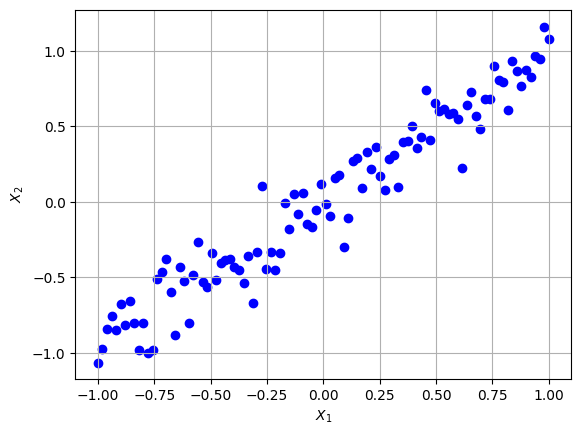

In [3]:
plt.scatter(X, y, c='blue')
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.grid()
plt.show()

In [4]:
X = np.concatenate((X[..., None], y[..., None]), axis=1) #creamos un array bidimensional de 100x2
X.shape

(100, 2)

Estandarizamos los datos (media 0 y desviación típica 1)

In [ ]:
X_centered = X - X.mean(axis=0) #centramos el array bidimensional respecto la media para que tenga una media igual a 0 y desviación típica 1
#Si nos fijamos la columna 0(X) no se ve alterada porque los puntos ya eran equiespaciados, pero sí que se ven alterados los puntos de la columna 1(y)
X_centered

### 3.3.2. Identificación de Componentes Principales: SVD (Descomposición en valores singulares)

In [6]:
U, s, Vt = np.linalg.svd(a=X_centered) #svd: singular value descomposition https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [7]:
Vt

array([[ 0.70667154,  0.70754175],
       [-0.70754175,  0.70667154]])

In [8]:
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [9]:
c1, c2

(array([0.70667154, 0.70754175]), array([-0.70754175,  0.70667154]))

Los dos puntos c1 y c2 en 2D representan los puntos del vector unitario (origen en (0,0)) correspondientes a los 2 componentes principales (ejes que conservan la varianza). PCA asume que el conjunto de datos se centra en el origen, pero la implementación de `scikit-learn` se encarga de centrar los datos.

### 3.3.3. Projección en $d$ dimensiones

Una vez que hemos identificado todos los componentes principales, podemos reducir la dimensionalidad del dataset a $d$ dimensiones proyectándolo en el hiperplano definido por los primeros $d$ componentes principales.

La selección de este hiperplano garantiza que la proyección conserve la mayor varianza posible.

Para proyectar el conjunto de entrenamiento en el hiperplano y obtener un conjunto de datos reducido $X_{d-proj}$ de dimensionalidad $d$, calculamos la multiplicación matricial de la matriz del conjunto de entrenamiento $X$ por la matriz $W_{d}$.
$W_{d}$ es la matriz que contiene las primeras $d$ columnas de $V$ que representan los componentes principales.

$$X_{d-proj}=XW_d$$

Vamos a hacerlo en Python:

In [10]:
W2 = Vt.T[:, :2]

In [11]:
X2D = X_centered.dot(W2)
X2D.shape

(100, 2)

Utlizando Scikit-Learn

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
X2D = pca.fit_transform(X)

In [15]:
assert np.all(np.abs(pca.components_) == np.abs(W2))

### 3.3.4. Ratio de varianza definida/explicada (Explained Variance Ratio)

Ahora vamos a mostrar el porcentaje de varianza explicada/definida por cada una de las variables/componentes de la muestra. (El porcentaje o ratio indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo de cada componente principal)

Si consultadmos nuestro modelo de scikit-learn nos devuelve:

In [ ]:
pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_)

(array([0.98870713, 0.01129287]), 1.0)

Este valor nos quiere decir que utilizando las 2 primeras variables (sobretodo la primera que ya aporta un 98%) obtendríamos un 99% de la información que nos aporta el dataset

###  3.3.5. Selección del número correcto de dimensiones

Deberíamos elegir la número de dimensiones que sumen una gran parte de la varianza que se encuentra dentro del conjunto de datos original (Ejemplo: $>=95\%$), a menos que estemos reduciendo la dimensionalidad para visualizar los datos.

Hagámoslo en scikit-learn:

In [17]:
pca = PCA()

In [ ]:
pca.fit(X)

In [19]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

Número de componentes principales necesarios para mantener al menos un 95% de la varianza del dataset.

In [20]:
d = np.argmax(cumsum >= .95) + 1

In [ ]:
d

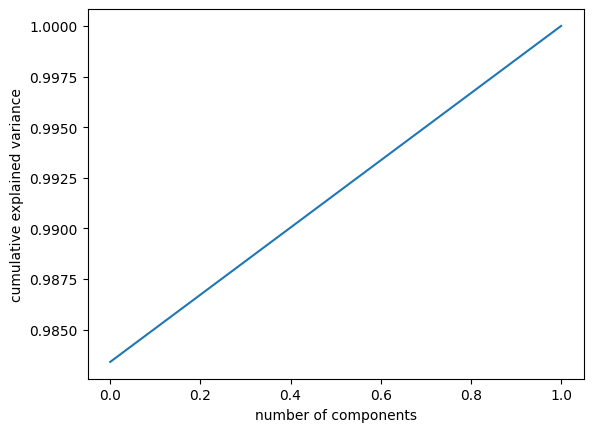

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Luego volvemos a ejecutar el entrenamiento PCA usando $d$. Sin embargo, hay una opción mucho mejor, la de especificar un valor flotante para `n_components` como la relación de varianza que queremos conservar.

In [ ]:
pca = PCA(n_components=0.95)

In [ ]:
X_reduced = pca.fit_transform(X)

## EXTRA: PCA para compresión

Después de la reducción de dimensionalidad, el conjunto de entrenamiento ocupa mucho menos espacio.

También es posible descomprimir el conjunto de datos reducido a $784$ (en el caso de MNIST) aplicando **la transformación inversa de la proyección PCA**. Esto no nos devolverá los datos originales ya que el 5 % de la varianza se perdió durante la compresión, pero probablemente estará cerca del conjunto de datos original.

La distancia cuadrática media entre el conjunto de datos original y el conjunto de datos descomprimido se denomina error de reconstrucción.

Si lo queremos calcular con scikit-learn:

In [21]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [22]:
X, y = datasets.fetch_openml(name='mnist_784', return_X_y=True)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46900, 784), (23100, 784), (46900,), (23100,))

In [25]:
pca = PCA(n_components=154)

In [26]:
X_reduced = pca.fit_transform(X_train)

In [28]:
X_recovered = pca.inverse_transform(X_reduced)

In [ ]:
plt.imshow(X_train[0:1].values.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

In [ ]:
plt.imshow(X_recovered[0].reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

La siguiente es la ecuación de la transformación inversa:

$$X_{recovered}=X_{d-proj}W_{d}^{T}$$

## EXTRA 2: PCA aleatorio

Podemos usar un algoritmo estocástico llamado *PCA aleatorio* que encuentra rápidamente una aproximación de los primeros $d$ componentes principales. Su complejidad computacional es $O(m \times d^{2})+O(d^3)$ en lugar de $O(m \times n^{2})+O(n^3)$ de SVD. Entonces es dramáticamente más rápido que SVD cuando $d << n$.

Usémoslo con `scikit-learn`:

In [18]:
rnd_pca = PCA(n_components=154, svd_solver='randomized')

In [19]:
X_reduced = rnd_pca.fit_transform(X_train)

## EXTRA 3: PCA incremental

Un problema con las implementaciones anteriores es que requieren que todos los datos de entrenamiento quepan en la memoria. Afortunadamente, se han desarrollado algoritmos de **PCA incremental** que permiten dividir el conjunto de entrenamiento en mini lotes y alimentarlos uno a uno a la vez al algoritmo IPCA. Esto es útil cuando se tienen conjuntos de entrenamiento grandes o se está ejecutando online.

Experimentemos con PCA incremental usando scikit-learn:

In [28]:
from sklearn.decomposition import IncrementalPCA

In [29]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

In [30]:
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)

In [31]:
X_reduced = inc_pca.transform(X_train)

# Ejercicios

**1. ¿Cuáles son las principales motivaciones para reducir la dimensionalidad de un Dataset? ¿Cuáles son los principales inconvenientes?**

**2. Carga el dataset de MNIST de reconocimiento de dígitos y divídelo en los conjuntos train/test**

**2.1. Entrena a un clasificador de random forest en el dataset y cronometre cuánto tiempo lleva**

In [ ]:
# Para conometrar el tiempo de entrenamiento
%timeit -n1 -r1 forest.fit(X_train, y_train)

**2.2. Evalúa el modelo resultante en el conjunto de prueba**

**2.3. Usa PCA para reducir la dimensionalidad del conjunto de datos con una relación de varianza explicada del 95%**

**2.4. Entrena un random forest classifier en el dataset reducido y mira cuánto tiempo tarda. ¿Fue el entrenamiento mucho más rápido?**

**2.5. A continuación, evalúa el clasificador en el conjunto de prueba. ¿Cómo se compara con el clasificador anterior?**

**3. Carga el dataset de wine y aplica el algoritmo PCA para reducir su dimensionalidad: 3.1. Comprueba los posibles valores nulos- 3.2. Visualiza la distribución espacial (correlaciones e histogramas) y analiza los resultados 3.3. Preprocesa los datos para poder realizar el análisis PCA- 3.4. Entrena PCA y analiza la varianza explicada/definida ¿Con cuántas dimensiones podríamos representar los datos sin perder, a priori, mucha información? 3.5. Repite los apartados (puedes probar otros clasificadores) del ejercicio 2 con este dataset.3.6. Consulta el notebook *ML.3.3.Visualization_extraction-PCA.ipynb* y utiliza PCA para visualización del dataset.**